In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

In [157]:
def kmeans_cluster(row_values, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters,random_state=42)
    kmeans.fit(row_values.reshape(-1, 1))
    cluster_labels = kmeans.labels_
    
    
    cluster_avg_values = {}

    for cluster_label in np.unique(cluster_labels):
        cluster_avg_values[cluster_label] = np.mean(row_values[cluster_labels == cluster_label])

    min_avg_cluster = min(cluster_avg_values, key=cluster_avg_values.get)
    max_avg_cluster = max(cluster_avg_values, key=cluster_avg_values.get)
    if cluster_avg_values[min_avg_cluster] > (
        0.1
    ):
        print("cluster adjust boolformer correct")
        #if (min(row_values) < 0.2):
        #    min_avg_cluster = -1
        cluster_labels = [-1 if val > 0.2 else min_avg_cluster for val in list(row_values)]
    
    return cluster_labels


def get_min_avg_cluster(row, clusters):
    cluster_avg_values = {}

    for cluster_label in clusters.unique():
        cluster_avg_values[cluster_label] = np.mean(row[clusters == cluster_label])

    min_avg_cluster = min(cluster_avg_values, key=cluster_avg_values.get)
    max_avg_cluster = max(cluster_avg_values, key=cluster_avg_values.get)
    if cluster_avg_values[min_avg_cluster] > (
        0.30 * cluster_avg_values[max_avg_cluster]
    ):
        print("cluster adjust boolformer shouldnt happen")
        min_avg_cluster = -2
    return min_avg_cluster

In [2]:
df = pd.read_csv(
    "/home/cameron/repos/Beeline_boolformer/BEELINE-data/inputs/Curated/mCAD/mCAD-2000-1-70/Boolformer/ExpressionData_rolling.csv",
    index_col = 0
    )

In [3]:
df.T.head()

,E1263_1,E1065_1,E385_1,E1709_2,E1059_2,E1330_2,E697_2,E426_3,E934_3,E291_3,...,E1119_491,E1717_492,E1829_492,E1508_495,E1747_495,E284_496,E1359_496,E172_497,E1066_499,E1242_499
Coup,0.0,0.000000,0.000000,0.000000,0.004789,0.009422,0.007035,0.002402,0.000000,0.000000,...,2.248551,2.090223,2.065870e+00,1.704820e+00,1.852149e+00,1.818471e+00,1.774988e+00,2.128642e+00,2.134857e+00,1.953426e+00
Emx2,0.0,0.000000,0.000000,0.000000,0.000000,0.001117,0.001117,0.000000,0.000000,0.002059,...,2.539227,2.460060,1.991914e+00,1.910740e+00,2.240672e+00,1.896486e+00,1.862614e+00,2.436980e+00,2.458303e+00,2.454086e+00
Fgf8,0.0,0.852665,0.852665,0.000000,0.000000,0.000000,0.000000,0.751989,1.271664,0.519676,...,0.002778,0.002778,0.000000e+00,6.468730e-02,6.468730e-02,0.000000e+00,0.000000e+00,0.000000e+00,8.371329e-03,8.371329e-03
Pax6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000648,0.000648,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18
Sp8,0.0,0.000000,0.100629,0.300071,0.392044,0.192601,0.000000,0.000000,0.000000,0.278215,...,0.002737,0.000000,0.000000e+00,5.008303e-04,5.008303e-04,0.000000e+00,0.000000e+00,2.968481e-03,2.968481e-03,0.000000e+00


In [262]:
# The following three lines were created with the help of generative AI tools
ClusteredData = df.T.apply(
    lambda row: kmeans_cluster(row.values, 3), axis=1, result_type="broadcast"
)
min_avg_clusters = df.T.apply(
    lambda row: get_min_avg_cluster(row, ClusteredData.loc[row.name]), axis=1
)
print()
BinExpression = ClusteredData != min_avg_clusters[:, np.newaxis]

/home/cameron/miniconda3/envs/cam_env_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/cameron/miniconda3/envs/cam_env_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/cameron/miniconda3/envs/cam_env_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/cameron/miniconda3/envs/cam_env_2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1

In [263]:
BinExpression.iloc[8].value_counts()

IndexError: single positional indexer is out-of-bounds

In [264]:
import matplotlib.pyplot as plt

In [265]:
genes = list(BinExpression.index)
print(genes)

['Coup', 'Emx2', 'Fgf8', 'Pax6', 'Sp8']


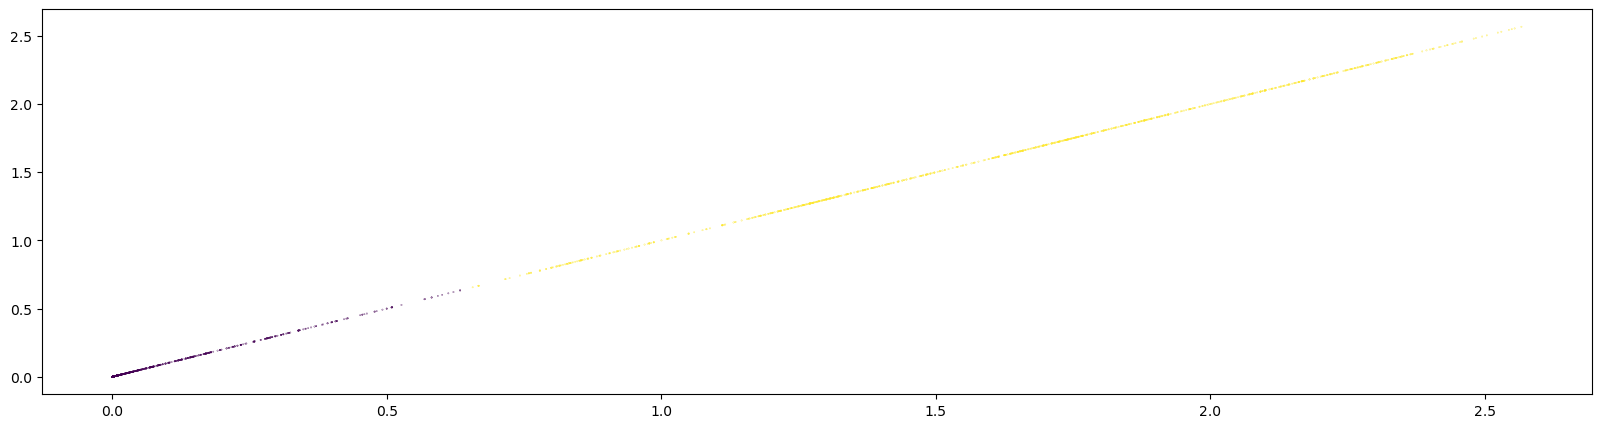

In [273]:
%matplotlib inline
x = 2
plt.figure(figsize=(20, 5))
plt.scatter(x=df.T.loc[genes[x]].values.tolist(),y=df.T.loc[genes[x]].values.tolist(),c=BinExpression.loc[genes[x]].values.tolist(),s=0.05)
plt.show()

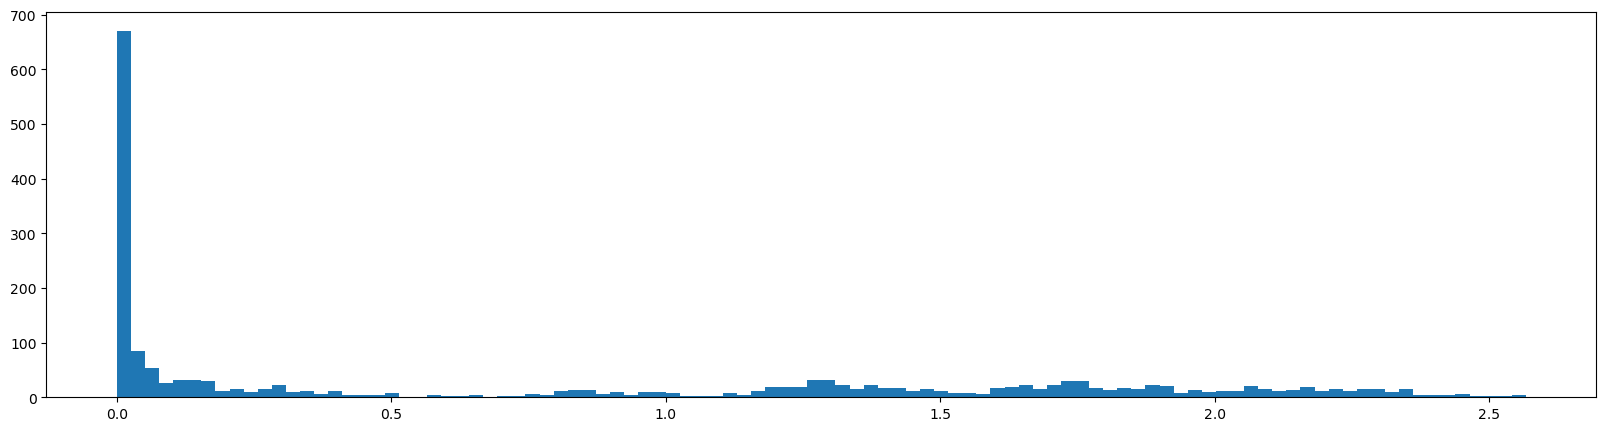

In [274]:
plt.figure(figsize=(20, 5))
plt.hist(df.T.loc[genes[x]].values.tolist(),bins=100)
plt.show()

In [281]:
df.iloc[[2,0,2]]

,Coup,Emx2,Fgf8,Pax6,Sp8
E1263_1,0.0,0.0,0.000000,0.0,0.000000
E1065_1,0.0,0.0,0.852665,0.0,0.000000
E385_1,0.0,0.0,0.568443,0.0,0.067086


In [282]:
df.iloc[[2,0,1]]

,Coup,Emx2,Fgf8,Pax6,Sp8
E385_1,0.0,0.0,0.568443,0.0,0.067086
E1263_1,0.0,0.0,0.000000,0.0,0.000000
E1065_1,0.0,0.0,0.852665,0.0,0.000000


In [284]:
x = [0,1,2]

In [286]:
x[[1,2,0]]

TypeError: list indices must be integers or slices, not list

In [287]:
a = np.array([2, 3, 4], dtype=np.uint32)
b = np.array([5, 6, 7], dtype=np.uint32)

In [288]:
c = np.array([a,b])

In [289]:
c

array([[2, 3, 4],
       [5, 6, 7]], dtype=uint32)

In [18]:
df['Sp8'][:20]

E1263_1    0.000000
E1065_1    0.000000
E385_1     0.100629
E1709_2    0.300071
E1059_2    0.392044
E1330_2    0.192601
E697_2     0.000000
E426_3     0.000000
E934_3     0.000000
E291_3     0.278215
E1805_3    0.278215
E1823_4    0.000000
E23_5      0.000000
E927_5     0.000000
E495_5     0.000000
E850_5     0.437902
E1870_6    0.437902
E1755_6    0.548989
E1593_7    1.018778
E1409_8    0.469788
Name: Sp8, dtype: float64

In [21]:
df['Sp8'].rolling(5,min_periods=1,win_type='exponential').mean()[:20]

E1263_1    0.000000
E1065_1    0.000000
E385_1     0.009060
E1709_2    0.041489
E1059_2    0.131615
E1330_2    0.252878
E697_2     0.292513
E426_3     0.188113
E934_3     0.061757
E291_3     0.031757
E1805_3    0.069777
E1823_4    0.189673
E23_5      0.189673
E927_5     0.069777
E495_5     0.018766
E850_5     0.029537
E1870_6    0.109826
E1755_6    0.335569
E1593_7    0.467914
E1409_8    0.601922
Name: Sp8, dtype: float64